In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from jupyter_dash import JupyterDash
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import seaborn as sns

In [3]:
# read data
vg = pd.read_csv("../data/vgsales.csv")
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  Int64  
 1   Name          16598 non-null  string 
 2   Platform      16598 non-null  string 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  string 
 5   Publisher     16540 non-null  string 
 6   NA_Sales      16598 non-null  Float64
 7   EU_Sales      16598 non-null  Float64
 8   JP_Sales      16598 non-null  Float64
 9   Other_Sales   16598 non-null  Float64
 10  Global_Sales  16598 non-null  Float64
 11  total         16598 non-null  Float64
dtypes: Float64(6), Int64(2), string(4)
memory usage: 1.6 MB


In [19]:
# convert 'Year' to Int64
# vg['Year'] = vg['Year'].astype('Int64')

# or just do it automatically using convert_dtypes()

vg = vg.convert_dtypes() 

In [26]:
# look at the rows with missing values
vg[vg.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total
179,180,Madden NFL 2004,PS2,<NA>,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,5.24
377,378,FIFA Soccer 2004,PS2,<NA>,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,3.5
431,432,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,<NA>,1.57,1.02,0.0,0.41,3.0,3.0
607,608,Space Invaders,2600,<NA>,Shooter,Atari,2.36,0.14,0.0,0.03,2.53,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,<NA>,Role-Playing,Unknown,0.01,0.0,0.0,0.0,0.01,0.01
16493,16496,The Smurfs,3DS,<NA>,Action,Unknown,0.0,0.01,0.0,0.0,0.01,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014,Puzzle,<NA>,0.0,0.01,0.0,0.0,0.01,0.01
16543,16546,Driving Simulator 2011,PC,2011,Racing,<NA>,0.0,0.01,0.0,0.0,0.01,0.01


In [25]:
vg.sort_values(by = ['Year'], ascending = False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01,0.01
13789,13791,Star Ocean 5: Integrity and Faithlessness,PS3,2016,Role-Playing,Square Enix,0.0,0.0,0.04,0.0,0.04,0.04
13763,13765,One Piece: Burning Blood,XOne,2016,Fighting,Namco Bandai Games,0.03,0.01,0.0,0.0,0.04,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,<NA>,Racing,Unknown,0.01,0.0,0.0,0.0,0.01,0.01
16327,16330,Inversion,PC,<NA>,Shooter,Namco Bandai Games,0.01,0.0,0.0,0.0,0.01,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,Unknown,0.01,0.0,0.0,0.0,0.01,0.01
16427,16430,Virtua Quest,GC,<NA>,Role-Playing,Unknown,0.01,0.0,0.0,0.0,0.01,0.01


There are only one value from year 2020 and also missing 2018 and 2019. I guess that the original data are ended at 2017 but that row may be inserted by accident or the year may be incorrect. After a quick search from the internet using the `Name`, the game's release date should be 2008 ([source](https://english-otome-games.fandom.com/wiki/Imagine:_Makeup_Artist))

In [24]:
# replace 2020 to 2008 in 'Year'
vg['Year'] = vg['Year'].replace(2020, 2008)

The data have some null value on `Year` and `Publisher`

<AxesSubplot:xlabel='NA_Sales', ylabel='Count'>

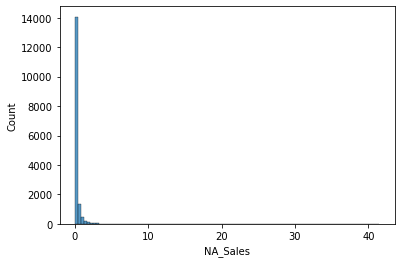

In [27]:
sns.histplot(data = vg, x = 'NA_Sales', bins = 100)

<AxesSubplot:>

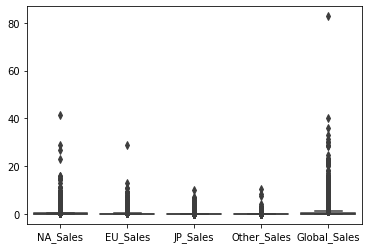

In [24]:
sns.boxplot(data = vg.iloc[:, 6:11])

The histogram and boxplot revealed that the Sales are heavily screwed 

<AxesSubplot:>

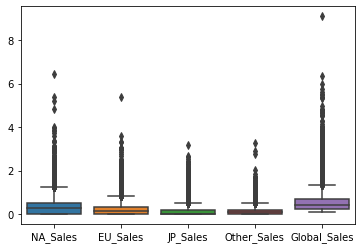

In [26]:
sns.boxplot(data = np.sqrt(vg.iloc[:, 6:11]))

In [11]:
vg['total'] = vg.iloc[:,6:10].sum(axis = 1)
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38


In [28]:
vg.nunique()

Rank            16598
Name            11493
Platform           31
Year               38
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
total            1009
dtype: int64

In [30]:
vg.to_csv('vgsales_clean.csv')